In [1]:
import google.generativeai as genai
from google.cloud import storage
import numpy as np
from PIL import Image as im

Key_Path="../Google_Key.txt"
with open(Key_Path, 'r') as file:
    content = file.read()
GOOGLE_API_KEY=content
genai.configure(api_key=GOOGLE_API_KEY)



In [2]:
# input prompt
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Hello")
print(response.text)

Hello there! How can I assist you today?


In [3]:
def load_data(bucket_name, file_name):
        bucket_name = bucket_name
        file_name = file_name
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(file_name)
        with blob.open('rb') as f:
                data = np.load(f,allow_pickle=True)
        return data.item()
        

In [4]:
bucket_name = 'crosstask'
filename='0FKNPVJSkWw.npy'
data=load_data(bucket_name, filename)

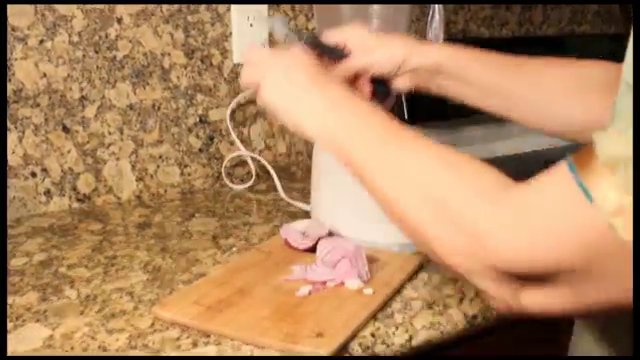

In [5]:
import cv2
img=im.fromarray(cv2.cvtColor(data['start_frames'][0,...], cv2.COLOR_BGR2RGB),'RGB')
img

In [10]:

prompt = """what do you see? your response must be one sentence and follow the below format:
<main object> <state>. 
example outputs: 1) slices of an avocado on a cutting board
3) a plate with two burritos on it
4) whipped cream in a bowl
"""

In [11]:

model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content([prompt, img])
print(response.text)

 A woman is cutting an onion on a wooden cutting board.
